In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from src.models import SIRM, SIRT, SIRV
from helps import *

: 

In [4]:
# visualization parameters

colors_X = ['#66c2a4', '#238b45','#00441b']  # fixed polarization
colors_Y = ['#67001f', '#e7298a', '#df65b0'] # fixed homophily
my_map = discretize_cmaps("hot_r",21)
my_map.set_bad(color='gray')
cmaps = [my_map]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [0, 3, 6],
        'xlim': [0, 1],
        'ylim': [0, 6]
    }

In [5]:
temp = read_json("./parameters.json")
mus, taus, xis, PARAMS = temp["mus"], temp["taus"], temp["xis"], temp["PARAMS"]
rect_coords_M = [mus["pol"][0], mus["h"][0], mus["pol"][2]-mus["pol"][0], mus["h"][2]-mus["h"][0]]
rect_coords_T = [taus["pol"][0], taus["h"][0], taus["pol"][2]-taus["pol"][0], taus["h"][2]-taus["h"][0]]
rect_coords_V = [xis["pol"][0], xis["h"][0], xis["pol"][2]-xis["pol"][0], xis["h"][2]-xis["h"][0]]

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
c:\users\nel_t\documents\work\projects\pol_hom - copia\src\utils\visualization\common.py:264: UserWarning: The following kwargs were not used by contour: 'rasterized'
  contour = ax.contour(
c:\users\nel_t\documents\work\projects\pol_hom - copia\src\utils\visualization\common.py:264: UserWarning: The following kwargs were not used by contour: 'rasterized'
  contour = ax.contour(


BS =  [0.31495795]
BS =  [0.31495795]


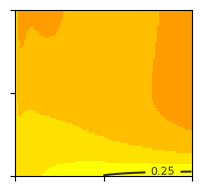

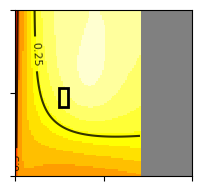

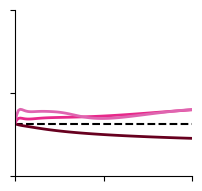

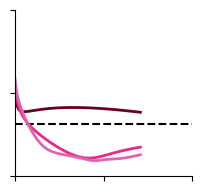

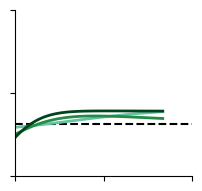

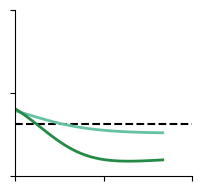

In [6]:
path_1_M = "figures/Fig_1/I(pol,hom)_M.pdf"
path_2_M = "figures/Fig_2/I(pol,hom,mean)_M.pdf"

NB = 100
NP = 100

homophilic_tendency = {"m": 0, "M": 6, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}

PARAMS["fixed_mean"] = 0.5
RM_1 = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=10000,
    population_size=5,
    batch_size=10000
)
PARAMS["beta_M"] = 0.4
PARAMS["fixed_mean"] = mus["mean"][1]
RM_2 = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=10000,
    population_size=5,
    batch_size=10000
)
PARAMS["beta_M"] = 0.2



fig_R_M_1 = plot_multiple_metrics(
    RM_1, 
    metrics=["infections"],
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    #rect_coords = rect_coords_T,
    save_path=path_1_M
)

fig_R_M_2 = plot_multiple_metrics(
    RM_2, 
    metrics=["infections"],
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    rect_coords = rect_coords_M,
    save_path=path_2_M
)

plot_fixed_homophily(RM_1, [0,3,6], SIRM, PARAMS, "figures/Fig_1/I(pol)_M.pdf")
plot_fixed_homophily(RM_2, [0,3,6], SIRM, PARAMS, "figures/Fig_2/I(pol)_M.pdf")
plot_fixed_polarization(RM_1, [0.1, 0.5, 0.9], SIRM, PARAMS, "figures/Fig_1/I(hom)_M.pdf")
plot_fixed_polarization(RM_2, [0.1, 0.5, 0.9], SIRM, PARAMS, "figures/Fig_2/I(hom)_M.pdf")

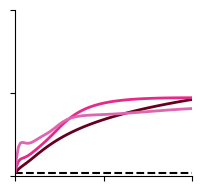

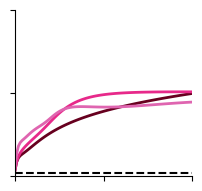

In [7]:
path_1_T = "figures/Fig_1/I(pol,hom)_T.pdf"
path_2_T = "figures/Fig_2/I(pol,hom,mean)_T.pdf"

NB = 100
NP = 100

homophilic_tendency = {"m": 0, "M": 6, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}

PARAMS["fixed_mean"] = 0.5
RT_1 = sweep_two_parameters(
    model_module=SIRT,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=10000,
    population_size=5,
    batch_size=10000
)

PARAMS["fixed_mean"] = taus["mean"][1]
RT_2 = sweep_two_parameters(
    model_module=SIRT,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=10000,
    population_size=5,
    batch_size=10000
)



#fig_R_T_1 = plot_multiple_metrics(
#    RT_1, 
#    metrics=["infections"],
#    cmaps=cmaps, 
#    contour_values=contour_values,
#    contour_colors=contour_colors,
#    final_params=final_params,
    #rect_coords = rect_coords_T,
#    save_path=path_1_T
#)

#fig_R_T_2 = plot_multiple_metrics(
#    RT_2, 
#    metrics=["infections"],
#    cmaps=cmaps, 
#    contour_values=contour_values,
#    contour_colors=contour_colors,
#    final_params=final_params,
#    rect_coords = rect_coords_T,
#    save_path=path_2_T
#)

plot_fixed_homophily(RT_1, [0,3,6], SIRT, PARAMS, "figures/Fig_1/I(pol)_T.pdf")
plot_fixed_homophily(RT_2, [0,3,6], SIRT, PARAMS, "figures/Fig_2/I(pol)_T.pdf")
#plot_fixed_polarization(RT_1, [0.1, 0.5, 0.9], SIRT, PARAMS, "figures/Fig_1/I(hom)_T.pdf")
#plot_fixed_polarization(RT_2, [0.1, 0.5, 0.9], SIRT, PARAMS, "figures/Fig_2/I(hom)_T.pdf")


c:\users\nel_t\documents\work\projects\pol_hom - copia\src\utils\visualization\common.py:264: UserWarning: The following kwargs were not used by contour: 'rasterized'
  contour = ax.contour(
c:\users\nel_t\documents\work\projects\pol_hom - copia\src\utils\visualization\common.py:264: UserWarning: The following kwargs were not used by contour: 'rasterized'
  contour = ax.contour(


BS =  [0.16845219]
BS =  [0.16845219]


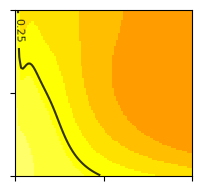

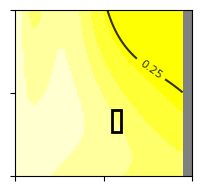

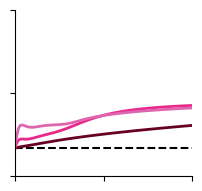

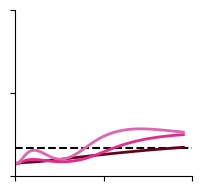

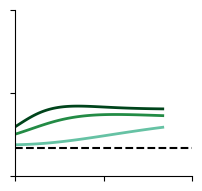

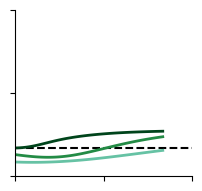

In [9]:
path_1_V = "figures/Fig_1/I(pol,hom)_V.pdf"
path_2_V = "figures/Fig_2/I(pol,hom,mean)_V.pdf"

NB = 100
NP = 100

homophilic_tendency = {"m": 0, "M": 6, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}

PARAMS["fixed_mean"] = 0.5
RV_1 = sweep_two_parameters(
    model_module=SIRV,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=10000,
    population_size=5,
    batch_size=1000
)

PARAMS["fixed_mean"] = xis["mean"][1]
RV_2 = sweep_two_parameters(
    model_module=SIRV,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=10000,
    population_size=5,
    batch_size=1000
)



fig_R_V_1 = plot_multiple_metrics(
    RV_1, 
    metrics=["infections"],
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    #rect_coords = rect_coords_V,
    save_path=path_1_V
)

fig_R_V_2 = plot_multiple_metrics(
    RV_2, 
    metrics=["infections"],
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    rect_coords = rect_coords_V,
    save_path=path_2_V
)


plot_fixed_homophily(RV_1, [0,3,6], SIRV, PARAMS, "figures/Fig_1/I(pol)_V.pdf")
plot_fixed_homophily(RV_2, [0,3,6], SIRV, PARAMS, "figures/Fig_2/I(pol)_V.pdf")
plot_fixed_polarization(RV_1, [0.1, 0.5, 0.9], SIRV, PARAMS, "figures/Fig_1/I(hom)_V.pdf")
plot_fixed_polarization(RV_2, [0.1, 0.5, 0.9], SIRV, PARAMS, "figures/Fig_2/I(hom)_V.pdf")

In [7]:
P_min_M, P_max_M = find_hpol_minmax(SIRM, mus, PARAMS)
P_min_T, P_max_T = find_hpol_minmax(SIRT, taus, PARAMS)
P_min_V, P_max_V = find_hpol_minmax(SIRV, xis, PARAMS)

Minimum R+I value: 0.0002
   at polarization = 0.2994, homophily = 3.1715
Maximum R+I value: 0.0002
   at polarization = 0.2506, homophily = 2.5085
Minimum R+I value: 0.4382
   at polarization = 0.4605, homophily = 2.0179
Maximum R+I value: 0.4602
   at polarization = 0.4995, homophily = 2.5061
Minimum R+I value: 0.2086
   at polarization = 0.5506, homophily = 1.6100
Maximum R+I value: 0.2386
   at polarization = 0.5994, homophily = 2.3900


Percentage increase in infections for M model: -55.24%


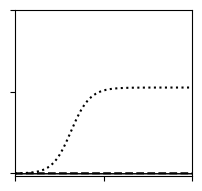

In [8]:
N_days = 1001
days = np.arange(0, N_days+1, 1)

MINS_M, MAXS_M, BASES_M, OG_M = calc_minmax_trajectories(SIRM, P_min_M, P_max_M, mus["mean"][1], PARAMS, simulated_days = N_days)
fig_comparison_M = plot_double_comparison(days, MINS_M, MAXS_M, BASES_M, OG_M, "figures/Fig_2/I(pol,hom)_M.pdf", Lx, Ly)

avg_predicted = (MINS_M[0][-1] + MINS_M[1][-1] + MAXS_M[0][-1] + MAXS_M[1][-1]) / 4

avg_base = (BASES_M[0][-1] + BASES_M[1][-1]) / 2

perc_increase = ((avg_predicted - avg_base) / avg_base) * 100
print(f"Percentage increase in infections for M model: {perc_increase:.2f}%")

increase in infections for T model: x 680.78


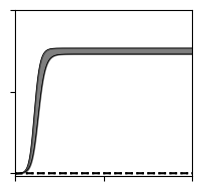

In [9]:
MINS_T, MAXS_T, BASES_T,OG_T = calc_minmax_trajectories(SIRT, P_min_T, P_max_T, taus["mean"][1], PARAMS, simulated_days = N_days)
fig_comparison_T = plot_double_comparison(days, MINS_T, MAXS_T, BASES_T, OG_T, "figures/Fig_2/I(pol,hom)_T.pdf", Lx, Ly)

avg_predicted = (MINS_T[0][-1] + MINS_T[1][-1] + MAXS_T[0][-1] + MAXS_T[1][-1]) / 4

avg_base = (BASES_T[0][-1] + BASES_T[1][-1]) / 2

perc_increase = ((avg_predicted - avg_base) / avg_base)
print(f"increase in infections for T model: x {perc_increase:.2f}")

Percentage increase in infections for V model: 128.31%


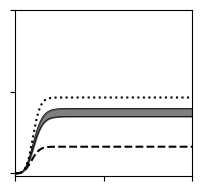

In [10]:
MINS_V, MAXS_V, BASES_V, OG_V = calc_minmax_trajectories(SIRV, P_min_V, P_max_V, xis["mean"][1], PARAMS, simulated_days = N_days)
fig_comparison_V = plot_double_comparison(days, MINS_V, MAXS_V, BASES_V, OG_V, "figures/Fig_2/I(pol,hom)_V.pdf", Lx, Ly)

avg_predicted = (MINS_V[0][-1] + MINS_V[1][-1] + MAXS_V[0][-1] + MAXS_V[1][-1]) / 4

avg_base = (BASES_V[0][-1] + BASES_V[1][-1]) / 2

perc_increase = ((avg_predicted - avg_base) / avg_base) * 100
print(f"Percentage increase in infections for V model: {perc_increase:.2f}%")

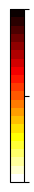

In [15]:
cbar_fig = create_standalone_colorbar(
    cmap_name=my_map,
    vmin=0,
    vmax=1,
    height=Ly,
    width=Ly/3,
    ticks=[0, 0.5, 1],
    ticklabels=[],
    save_path='figures/Fig_1/colorbar_Inf.pdf'
)